##**Context**
The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.
 

##**Objective**
Trade&Ahead is a financial consultancy firm that provides its customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

 
##**Data Description**

The data provided is of stock prices and some financial indicators like ROE, earnings per share, P/E ratio, etc.

**Data Dictionary**

* Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
* Company: Name of the company
* GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
* GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
* Current Price: Current stock price in dollars
* Price Change: Percentage change in the stock price in 13 weeks
* Volatility: Standard deviation of the stock price over the past 13 weeks
* ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
* Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
* Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
* NNet Income: Revenues minus expenses, interest, and taxes (in dollars)
* Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
*NEstimated Shares Outstanding: Company's stock is currently held by all its shareholders
* P/E Ratio: Ratio of the company's current stock price to the earnings per share
* P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)
 

In [28]:
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
# To supress warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = "/content/drive/MyDrive/stock_data.csv" 
df = pd.read_csv(df)
df

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096


##**Overview of the Dataset**

In [4]:
df.shape

(340, 15)

This dataset has 340 rows and 15 columns

In [5]:
#viewing a random sample of the dataset
df.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

The dataset consists of objects ,float64 and int64 datatypes.

In [7]:
df.duplicated().sum()

0

There are no duplicate and null values in the dataset

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


In [9]:
data = df.copy()

In [10]:
data.drop("Ticker Symbol", axis=1, inplace=True)

###**Exploratory Data Analysis (EDA)**

In [11]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="magma",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [12]:
def histogram_boxplot(data, feature, figsize=(16, 6), kde=False, bins=None, hue=None):
    """
    Combines boxplot and histogram

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (16,6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True,
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter",
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

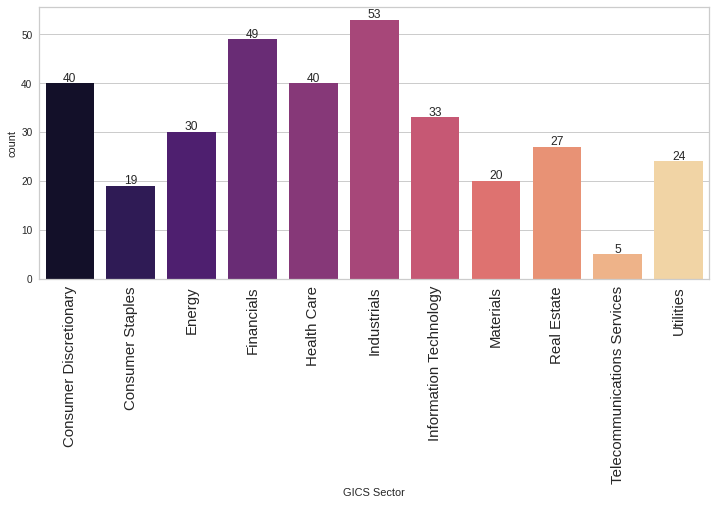

In [13]:
labeled_barplot(df, 'GICS Sector')

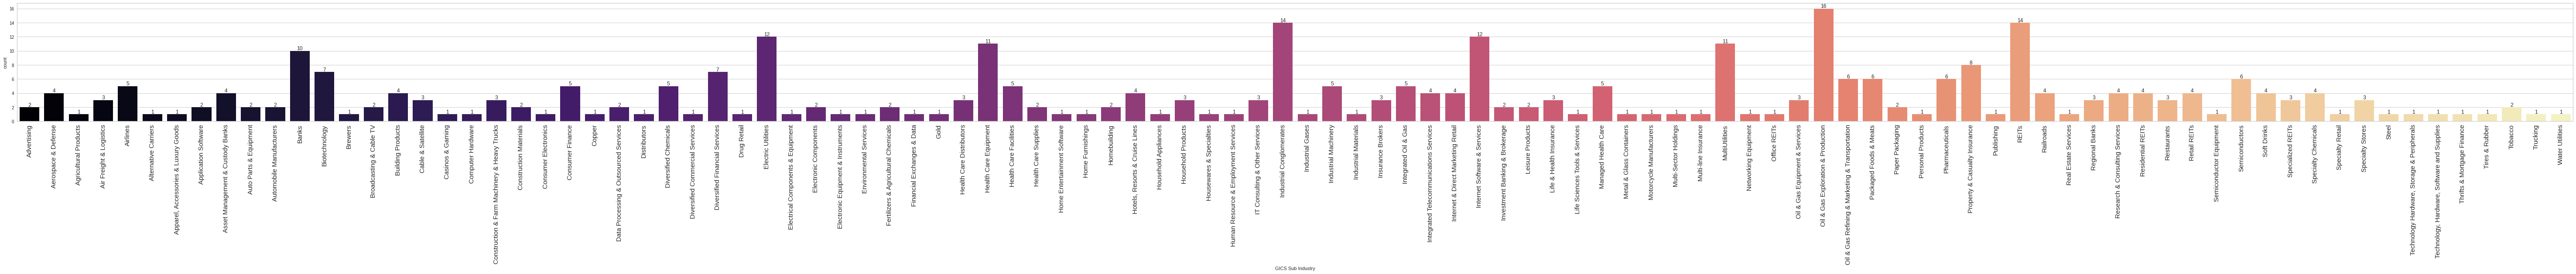

In [14]:
labeled_barplot(df, 'GICS Sub Industry')

**Numerical Columns**

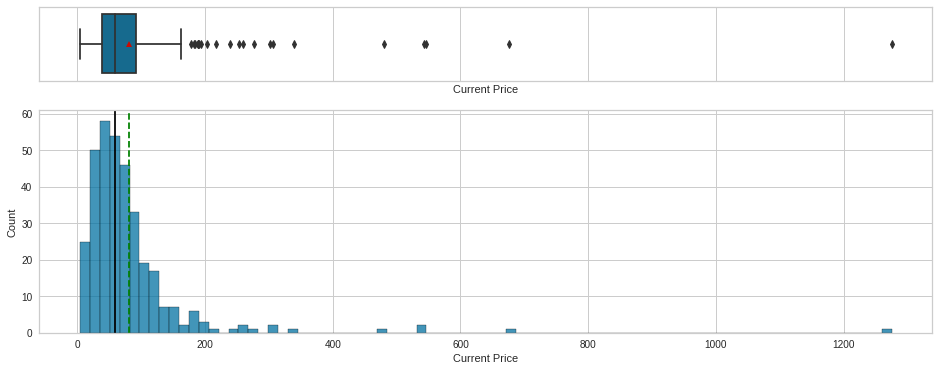

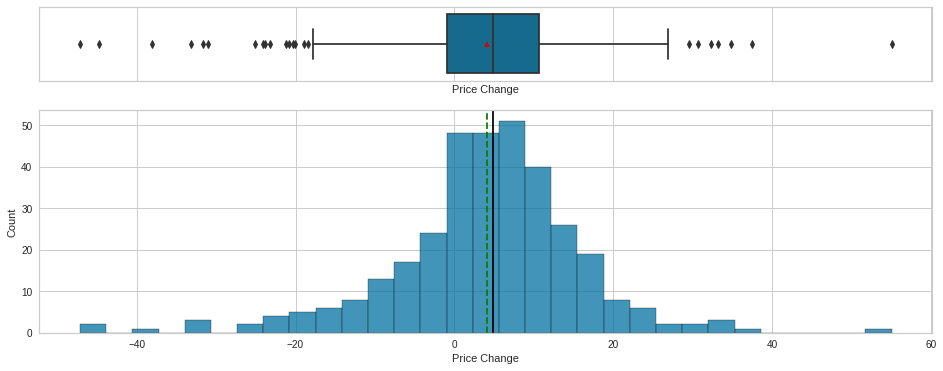

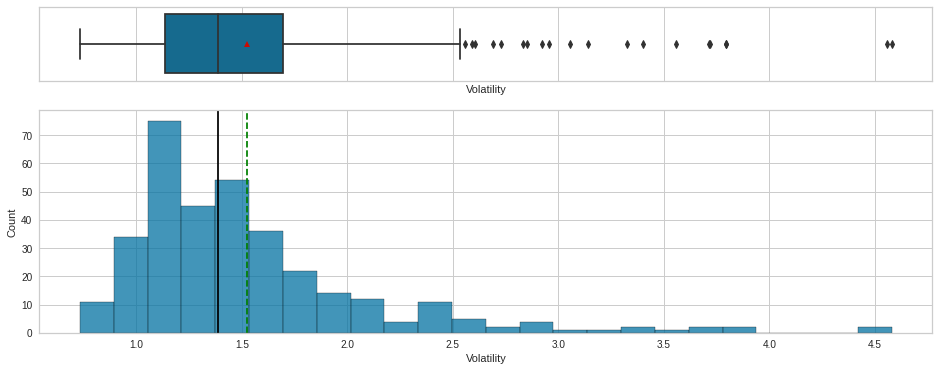

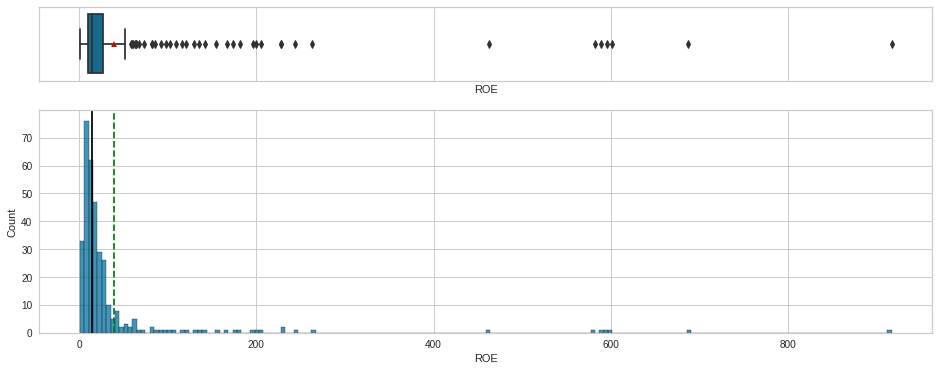

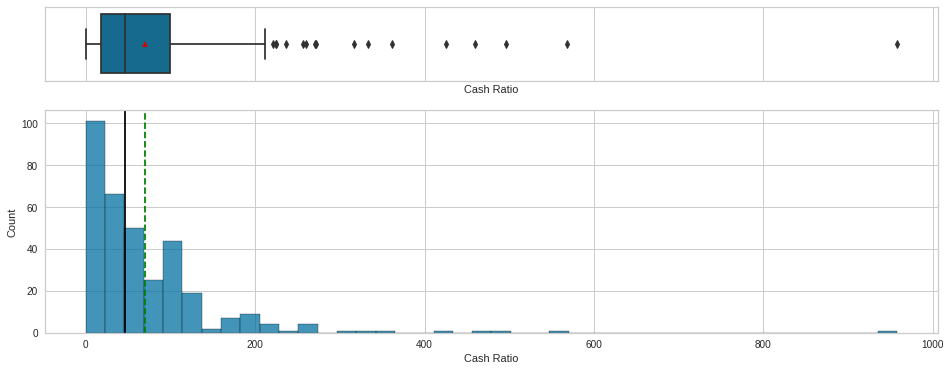

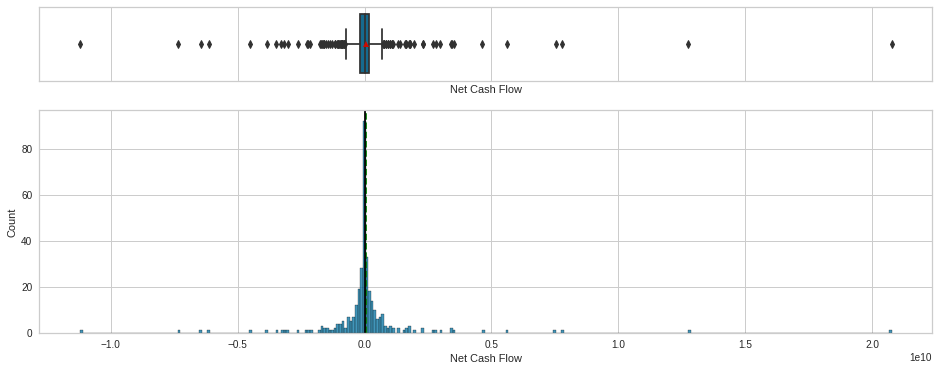

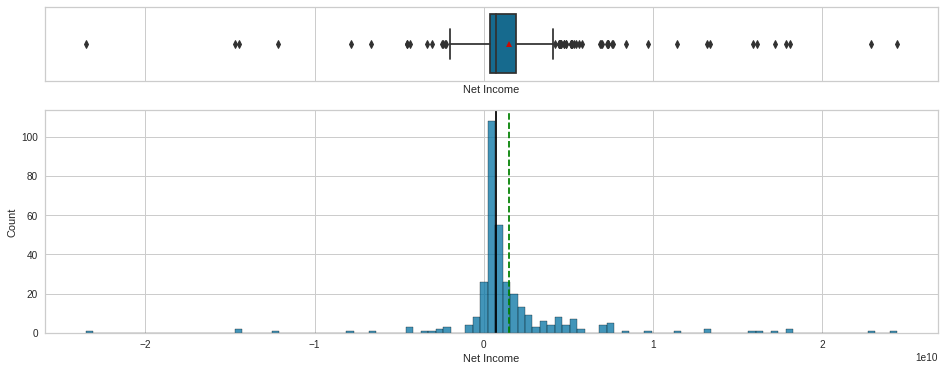

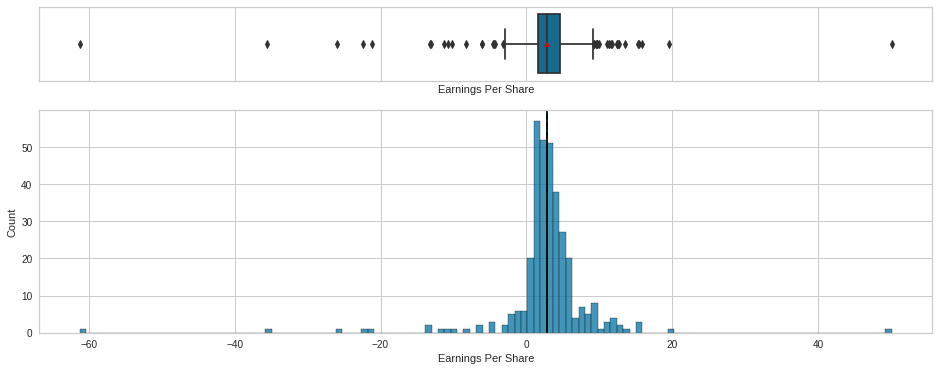

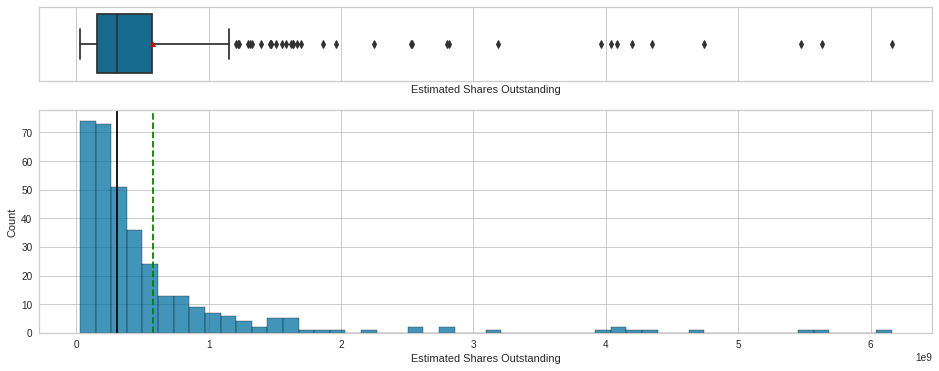

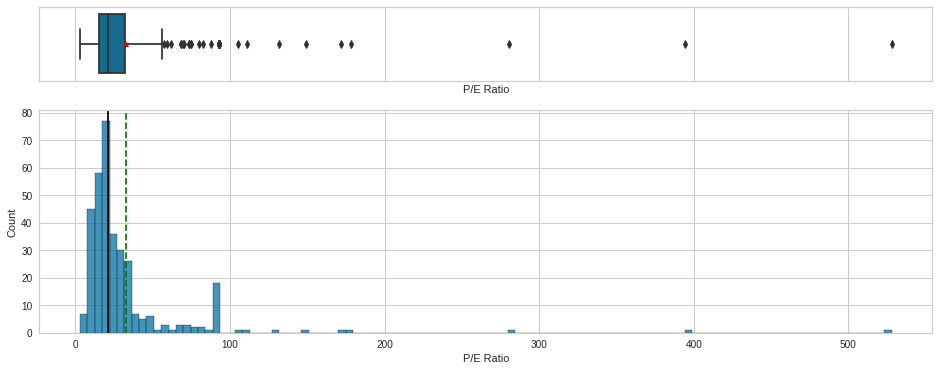

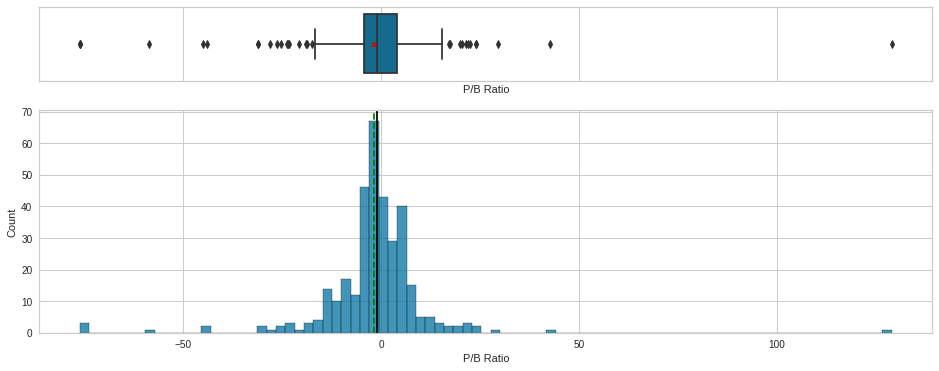

In [15]:
#create list of columns with numerical variables
num_col = data.select_dtypes(include=np.number).columns.tolist()

#display histograms and boxplots for all numerical columns
for col in num_col:
    histogram_boxplot(data, col)

**Questions:**

**1. What does the distribution of stock prices look like?**
- Current Price, Volatility, Cash Ratio, Estimated Shares Outstanding as well as P/E Ratio are right skewed with outlier.
- Price Change, Net Cash Flow, Net Income, Earnings Per Share and P/B Ratio all have normal distribution with outliers on both ends.
- ROE is heavily right skewed with several outliers.


**2. The stocks of which economic sector have seen the maximum price increase on average?**


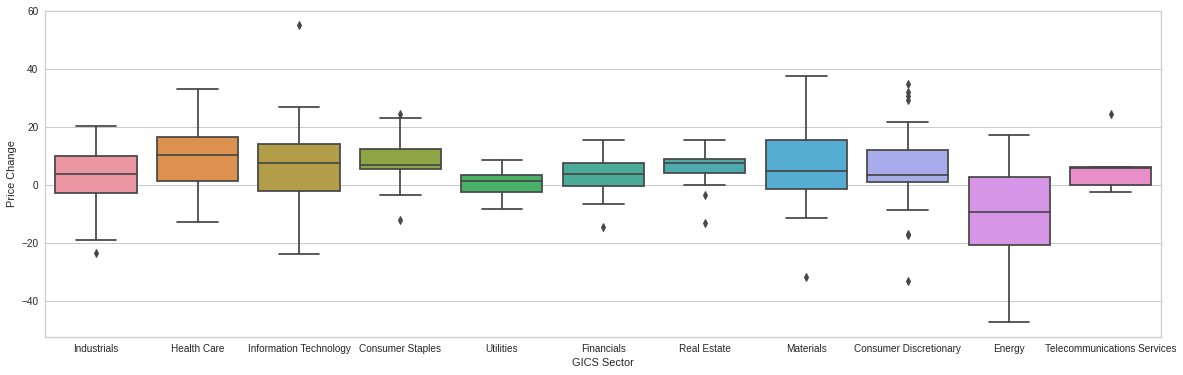

In [18]:
plt.figure(figsize=(20,6))
sns.boxplot(data = data, y = "Price Change", x = "GICS Sector");

In [19]:
data.groupby('GICS Sector')['Price Change'].mean().sort_values()

GICS Sector
Energy                        -10.228289
Utilities                       0.803657
Industrials                     2.833127
Financials                      3.865406
Materials                       5.589738
Consumer Discretionary          5.846093
Real Estate                     6.205548
Telecommunications Services     6.956980
Information Technology          7.217476
Consumer Staples                8.684750
Health Care                     9.585652
Name: Price Change, dtype: float64

* Energy has the lowest
(negative) average change in price change a while 
Healthcare and consumer staples have maximum number positive average price change compared to others.

**3. How are the different variables correlated with each other?**

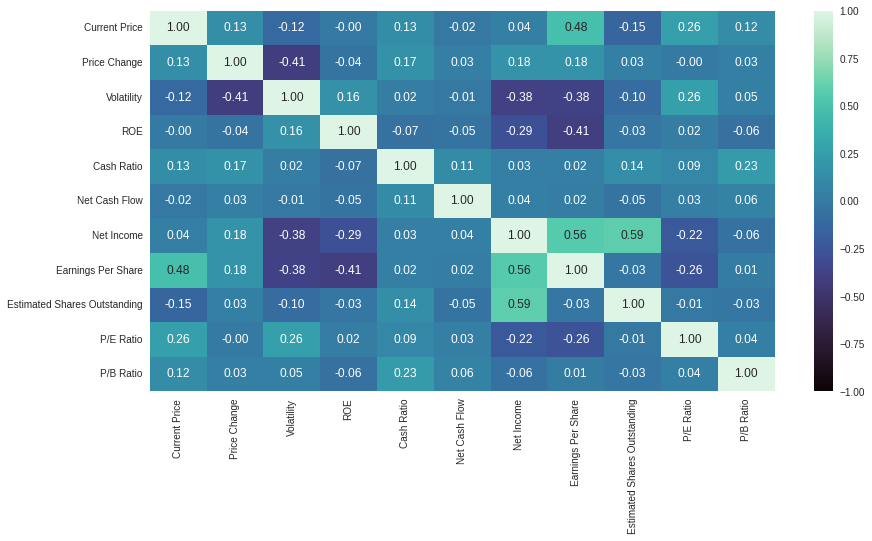

In [20]:
plt.figure(figsize=(14, 7))
sns.heatmap(
    data[num_col].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap='mako'
)
plt.show()

-  Price Change has a negative correlation with Volatility.
- Both net income ans earnings per share both negatively correlayed with volatility.
- Earnings per share has a positive correlation with current price.
- Earning per share isnegative correlation with ROE.



**4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

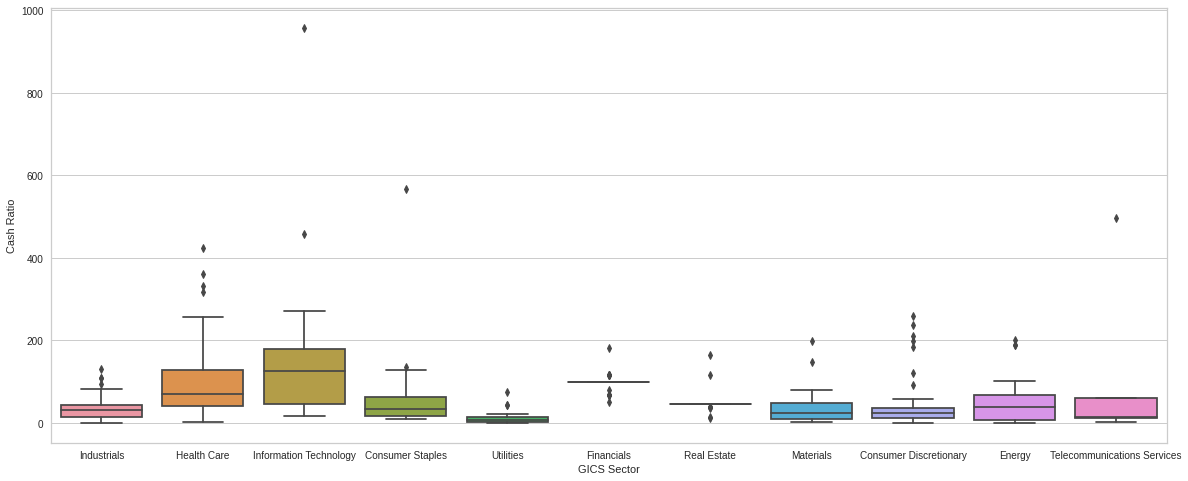

In [21]:
plt.figure(figsize=(20,8))
sns.boxplot(data = data, y = "Cash Ratio", x = "GICS Sector");

In [22]:
data.groupby('GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False)

GICS Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

* Both information technology and telecommunications sectors generate the highest higher average cash ratios while utilities generates the lowest average cash ratios of all sectors.

**5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

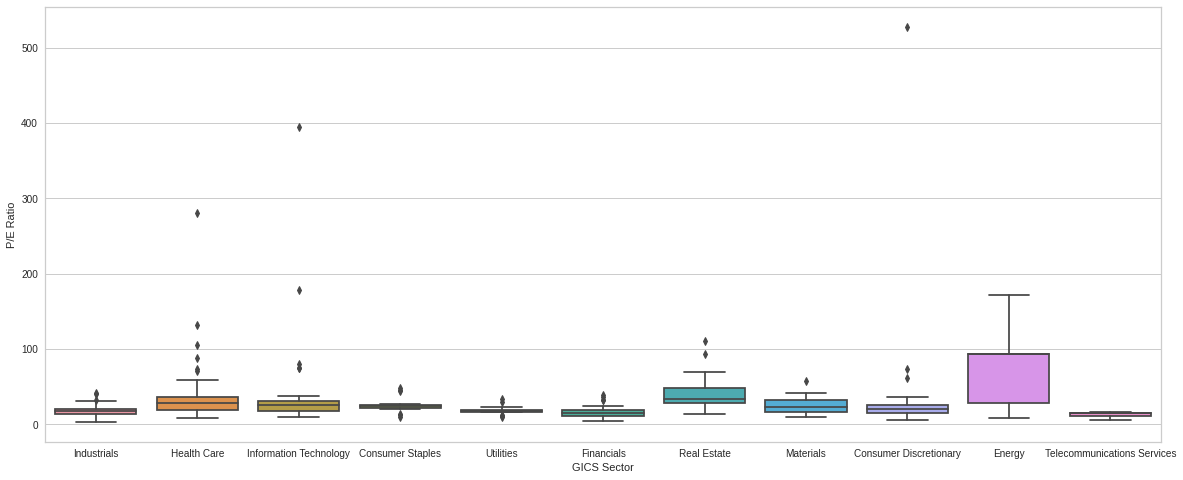

In [23]:
plt.figure(figsize=(20,8))
sns.boxplot(data = data, y = "P/E Ratio", x = "GICS Sector");

In [24]:
data.groupby('GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False)

GICS Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E Ratio, dtype: float64

* The Energy sector have the highest average P/E ratios while telecommunications servies have the lowest average P/E ratios.

###**Data Preprocessing**

**Let's scale the data before we proceed to cluster it.**

In [25]:
scaler = StandardScaler()
subset = data[num_col].copy()
subset_scaled = scaler.fit_transform(subset)
subset_scaled_data = pd.DataFrame(subset_scaled, columns=subset.columns)

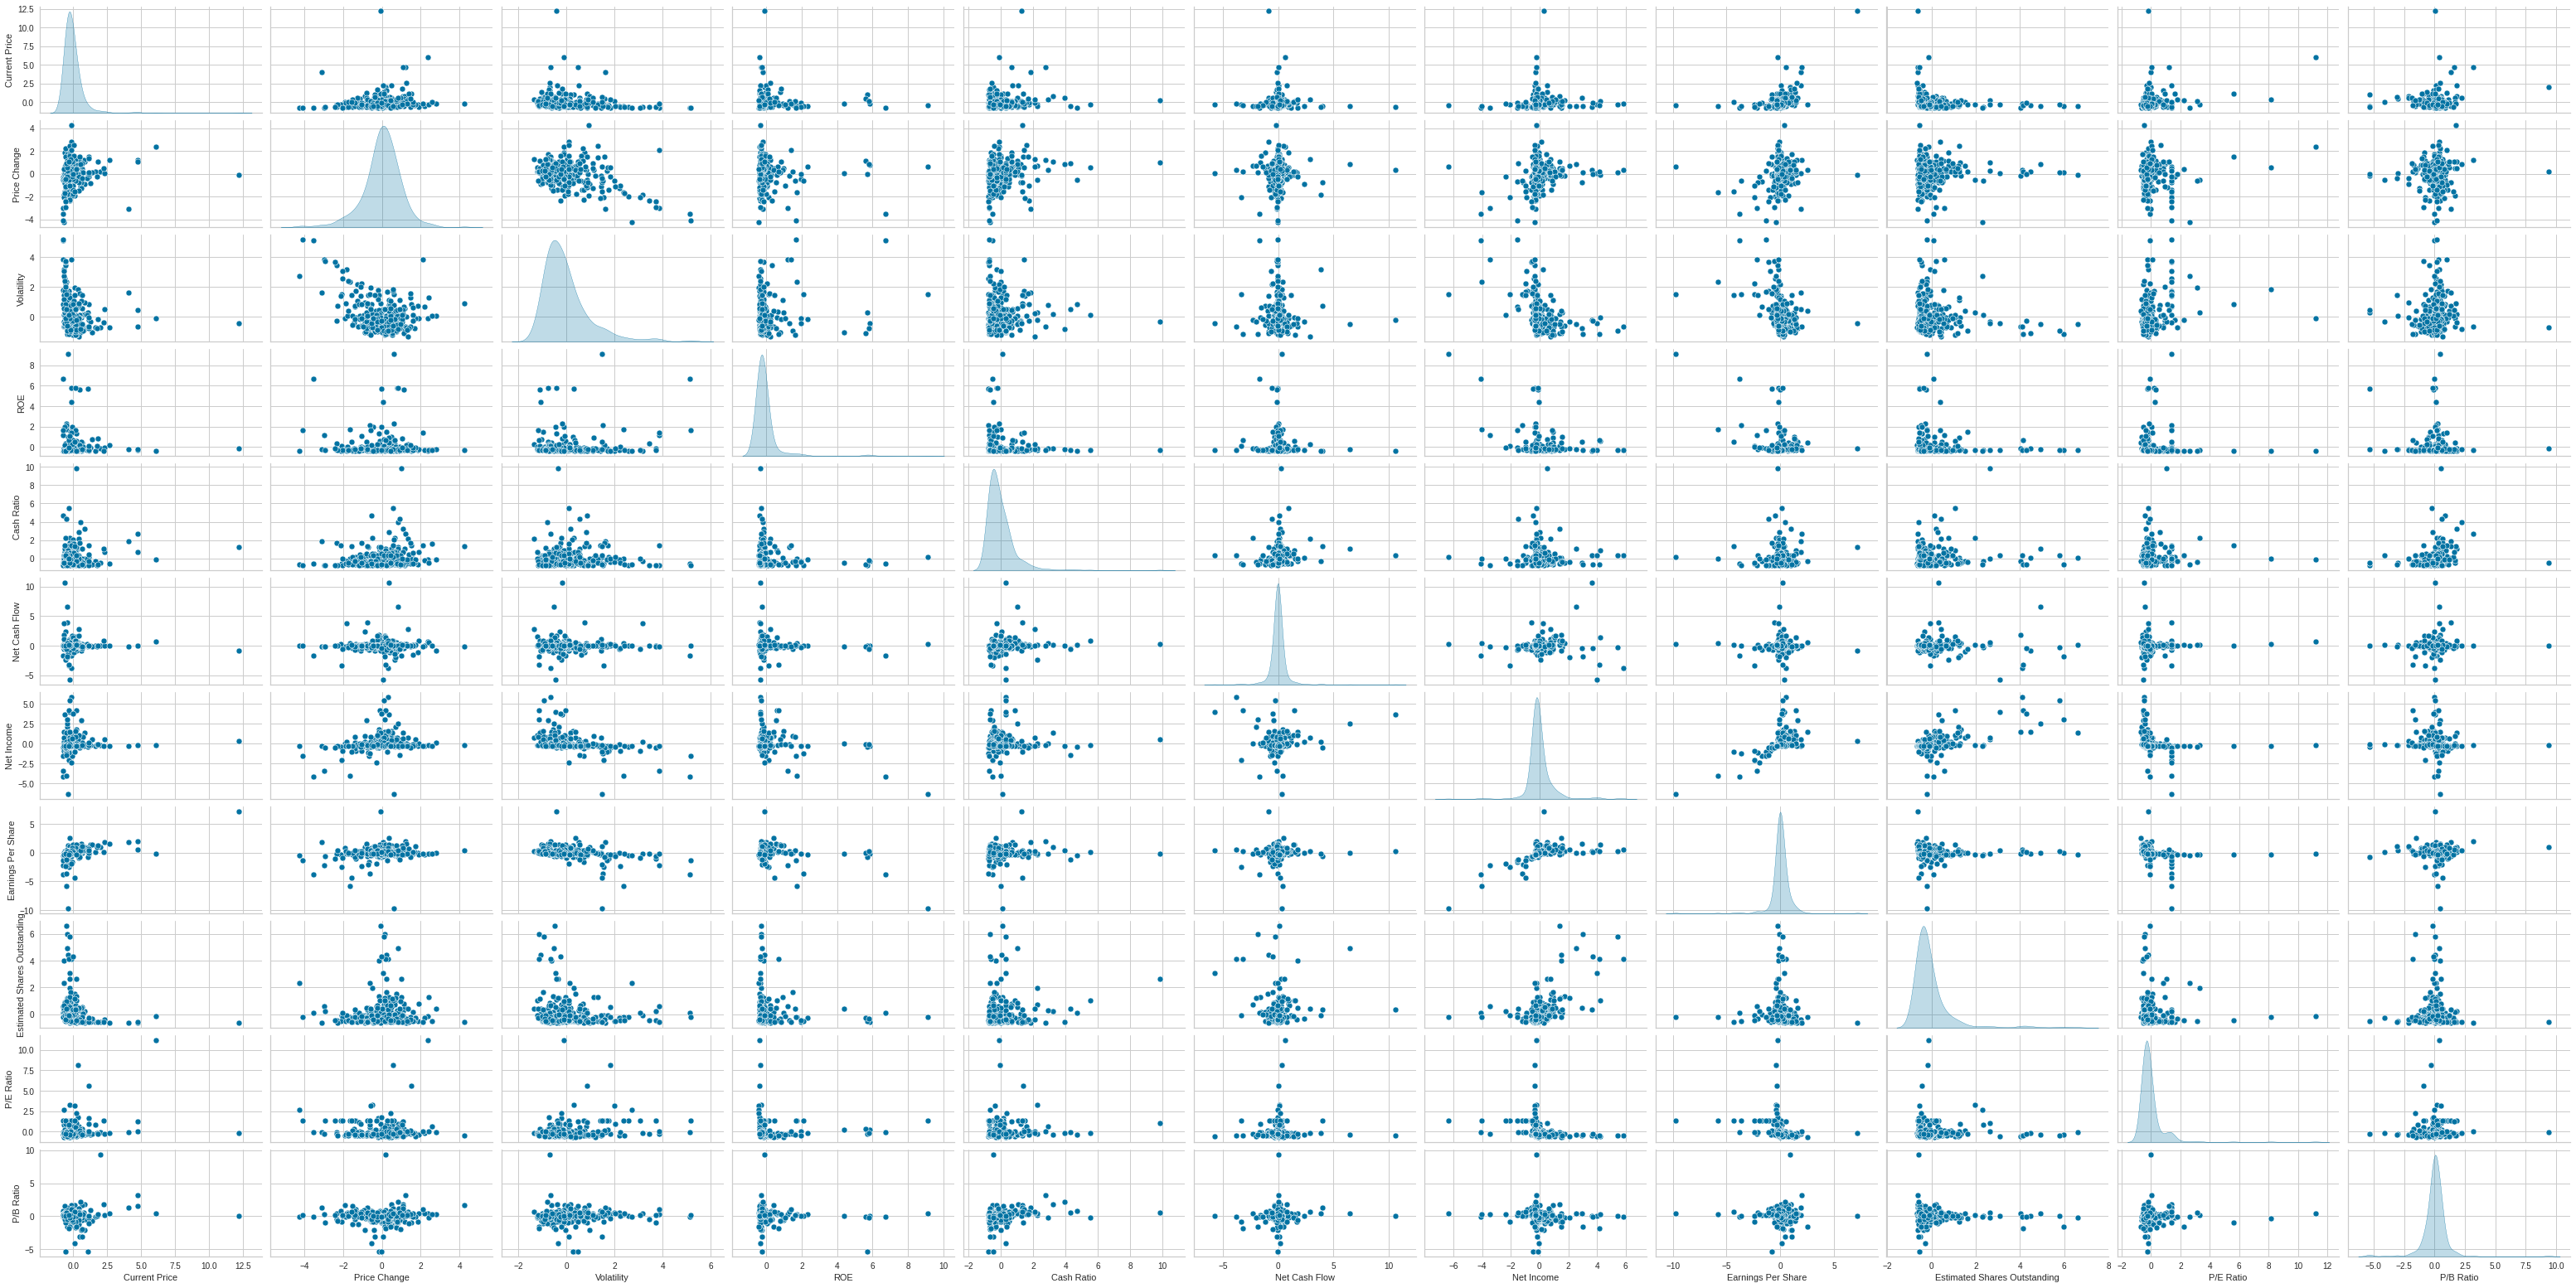

In [26]:
sns.pairplot(subset_scaled_data, height=2,aspect=2 , diag_kind='kde')
plt.show()

###**K-means Clustering**

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.175554082632614
Number of Clusters: 5 	Average Distortion: 2.1225218310422096
Number of Clusters: 6 	Average Distortion: 2.053350668955699
Number of Clusters: 7 	Average Distortion: 2.0129747565852085
Number of Clusters: 8 	Average Distortion: 1.9711152823639846


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

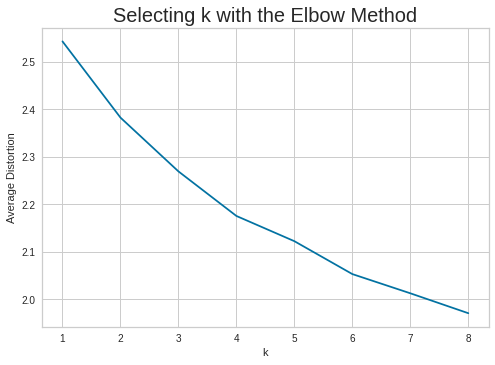

In [27]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_data)
    prediction=model.predict(subset_scaled_data)
    distortion=sum(np.min(cdist(subset_scaled_data, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_data.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

**Elbow at k=4**

In [29]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_data))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_data, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.43969639509980457)
For n_clusters = 3, silhouette score is 0.465292959074158)
For n_clusters = 4, silhouette score is 0.45434371948348606)
For n_clusters = 5, silhouette score is 0.40999356683171667)
For n_clusters = 6, silhouette score is 0.4105617151682673)
For n_clusters = 7, silhouette score is 0.37983220330478323)
For n_clusters = 8, silhouette score is 0.4323346312389557)
For n_clusters = 9, silhouette score is 0.3173320246466511)


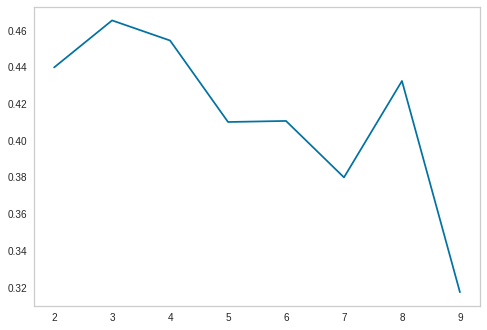

In [30]:
plt.plot(cluster_list,sil_score)
plt.grid()

From the silhouette scores, it seems that 4 is a good value of k.

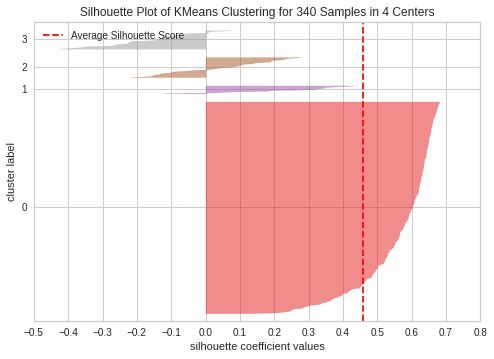

In [31]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_data)    
visualizer.show();

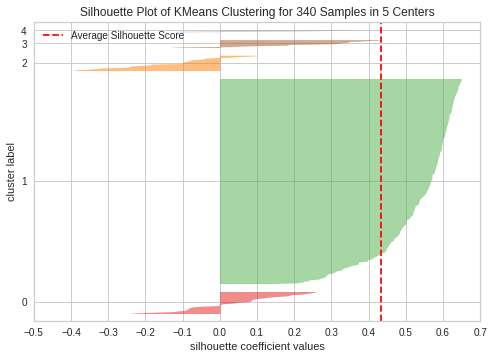

In [32]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_data)    
visualizer.show();

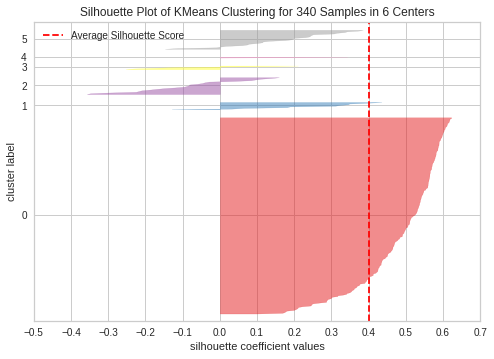

In [34]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state = 1))
visualizer.fit(subset_scaled_data)    
visualizer.show();

The number of clusters with the best performance appears to be 5

**Selecting final model**


In [35]:
#create kmeans cluster model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(subset_scaled_data)

KMeans(n_clusters=5, random_state=42)

In [36]:
data['K_means_segments'] = kmeans.labels_


###**Cluster Profiling**

In [37]:
#group dataset by kmeans cluster labels
cluster_profile = data.groupby("K_means_segments").mean()

#add counts for number of stocks in each cluster
cluster_profile["Count"] = (
    data.groupby("K_means_segments")["Current Price"].count().values
)

In [42]:
cluster_profile.style.highlight_max(color="magenta", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Count
K_means_segments,,,,,,,,,,,,
0,50.477272,5.588148,1.141171,31.545455,64.181818,-2581727272.727273,14675545454.545454,4.490909,4012176129.000000,14.010093,-5.356393,11
1,81.418719,10.536341,1.578634,17.000000,367.538462,3857062692.307693,3129067846.153846,2.197692,1334755181.584615,65.639418,6.235848,13
2,73.769121,5.466467,1.392827,34.632143,55.710714,4183132.142857,1443269353.571429,3.629625,430217149.035393,24.132318,-3.203999,280
3,38.808966,-13.680395,2.938240,106.034483,55.551724,-189825655.172414,-3578126517.241379,-8.657586,463121182.880690,85.946813,1.888901,29
4,585.527134,7.752090,1.508020,17.571429,159.142857,210520428.571429,804590428.571429,14.410000,116080574.760000,118.763084,33.713020,7


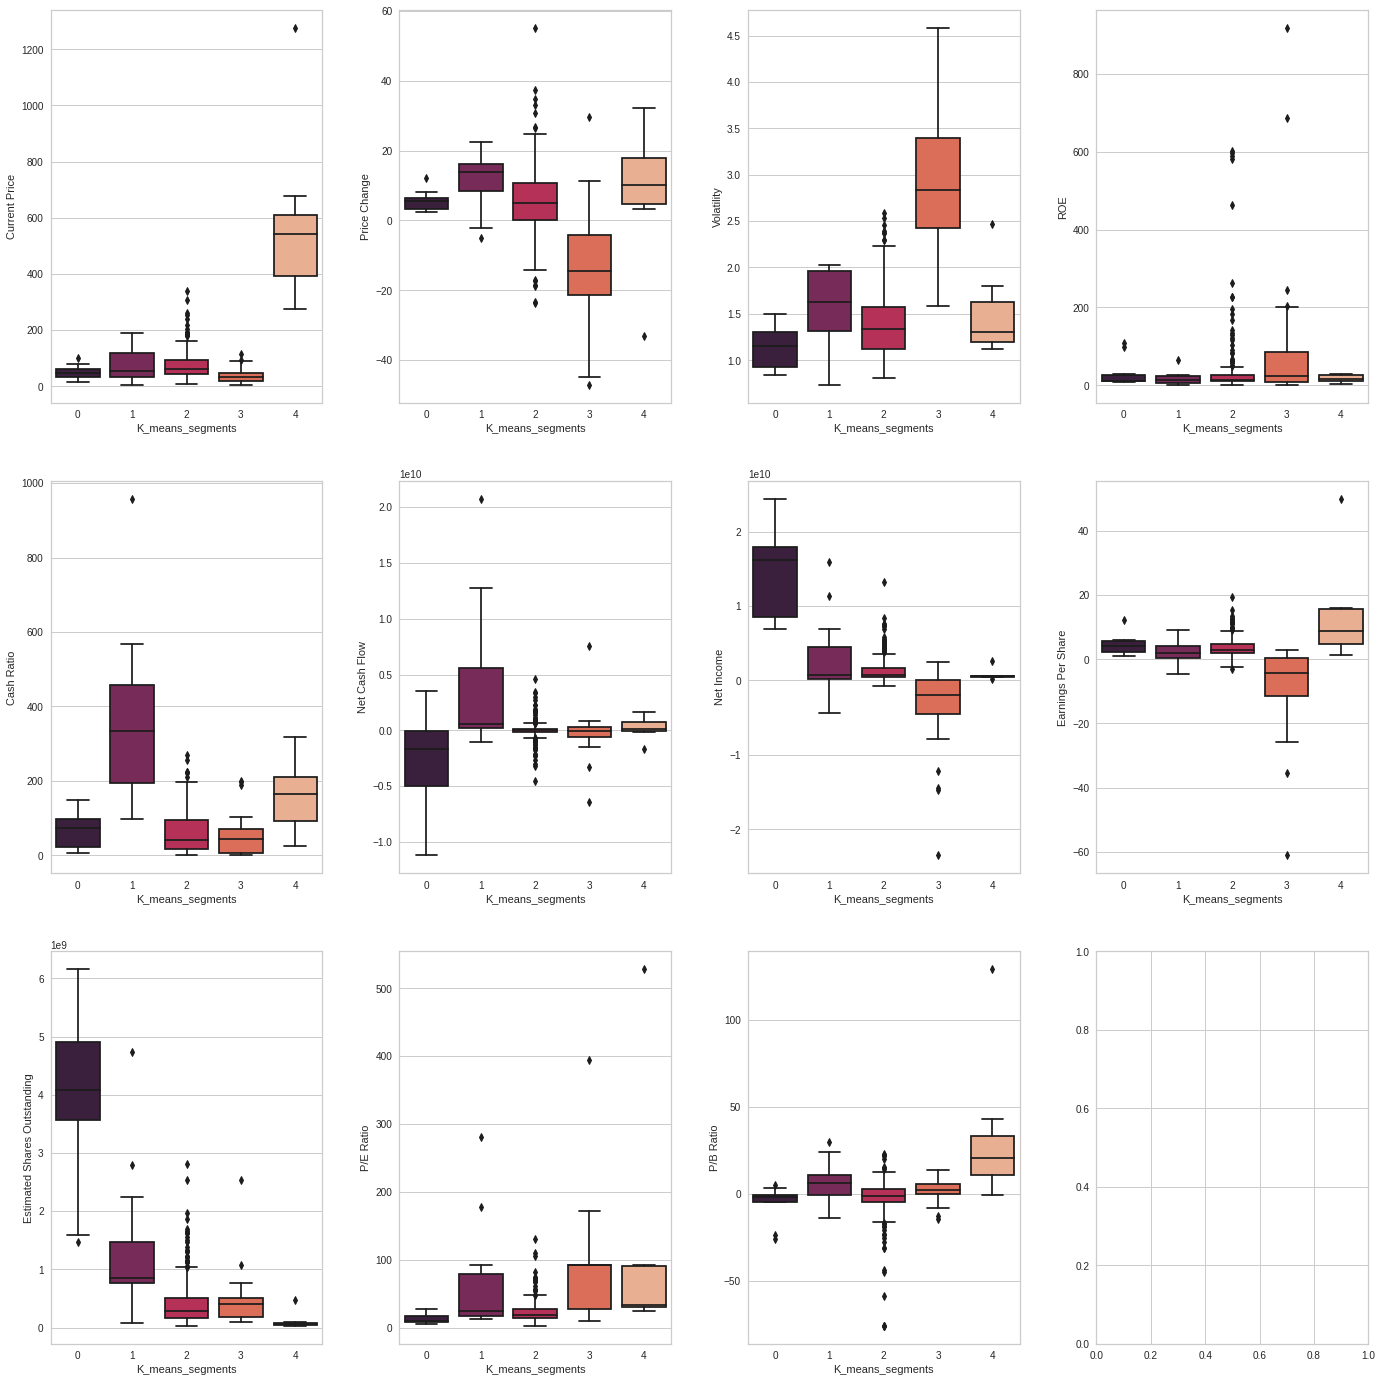

In [44]:
# show boxplots of numerical variables for each K-Means cluster
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=data,
                y=data.columns[3+counter],
                x="K_means_segments",
                palette="rocket"
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

**Insights**

**1. Cluster 0**
* Has about 11 different stocks.
* Lowest volatility
* Lowest net cash flow 
* The highest net incomes and estimated shres outstanding.

**2. Cluster 1**
* 13 stocks
* Highest price change and cash ratio as well as net cash flow.
* Moderate volatility

**3.Cluster 2**
* 280 stocks
* Low cash ratio and net cash flow
* Lowest P/E ratios.
 
**4. Cluster 3**

* 29 stocks
* Lowest stock price change
* High volatility and ROE 
* Negative net cash flow, earnings per share and net income.

**5. Cluster 4**

* 7 stocks
* Highest current price
* High cash ratio and net cash flow
* Highest earnings per share, P/E ratio and P/R ratio.



###**Hierarchical Clustering**

In [46]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_data, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_data))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736
Cophenetic correlation for Ma

In [47]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        round(high_cophenet_corr,4), high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9423, which is obtained with Euclidean distance and average linkage.


In [48]:
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_data, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_data))
    print("Cophenetic correlation for {} linkage is {}".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922
Cophenetic correlation for complete linkage is 0.7873280186580672
Cophenetic correlation for average linkage is 0.9422540609560814
Cophenetic correlation for centroid linkage is 0.9314012446828154
Cophenetic correlation for ward linkage is 0.7101180299865353
Cophenetic correlation for weighted linkage is 0.8693784298129404


In [49]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage


###**Checking Dendrograms**

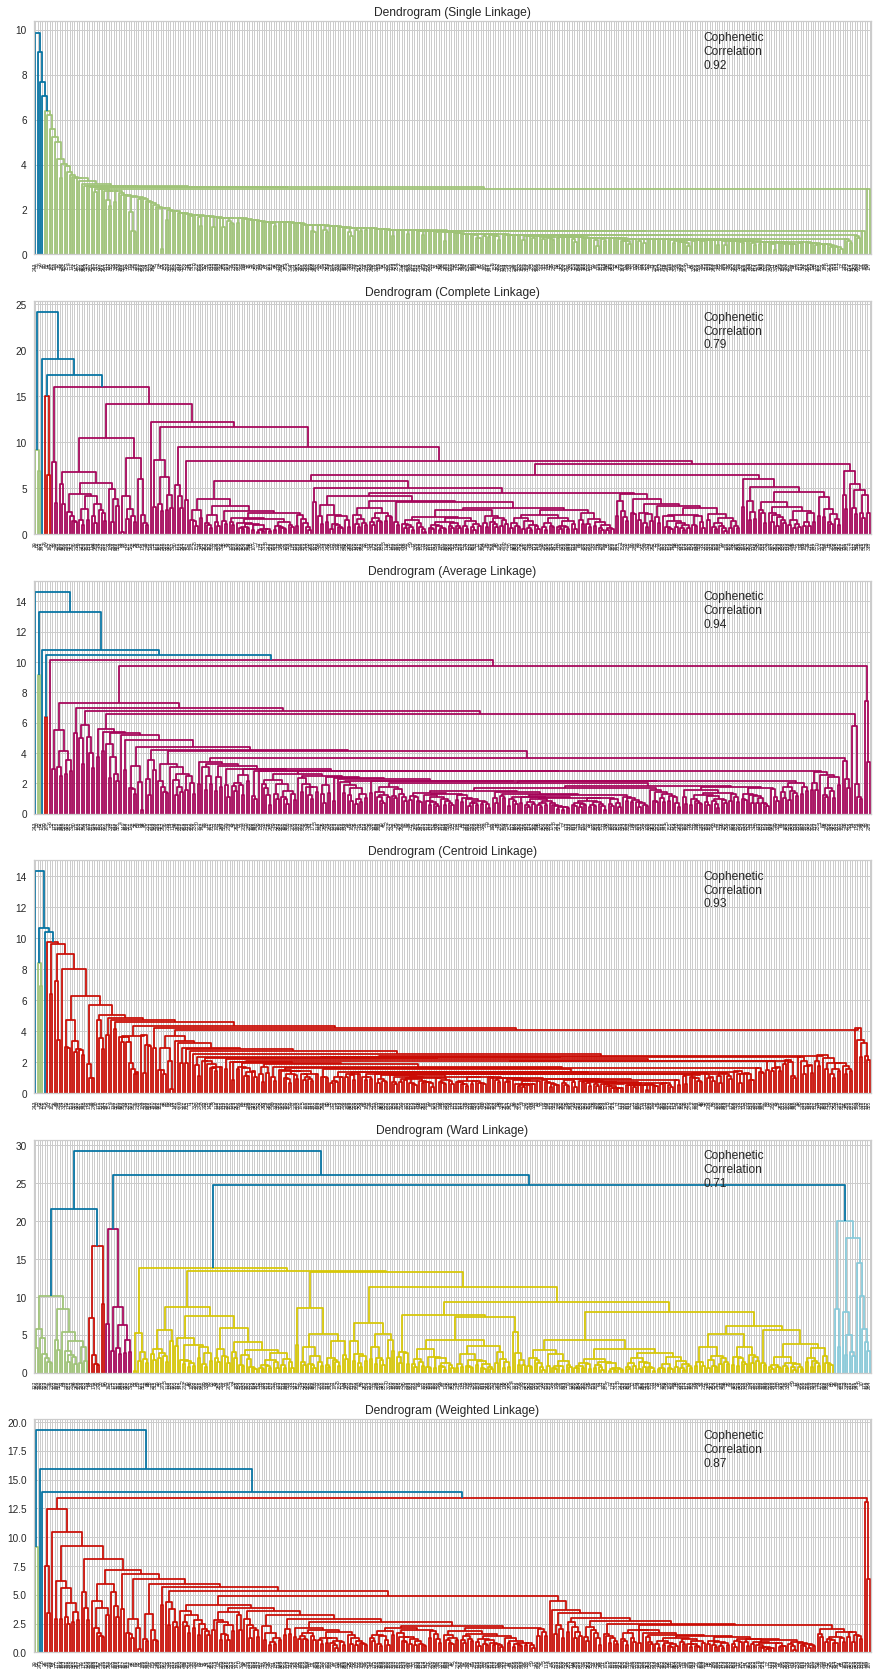

In [51]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_data, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_data))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

* The cophenetic correlation is highest  with eucledian distance & average or centroid linkages
5 appears to be the appropriate number of clusters from the dendrogram for average linkage.

**Creating Model using sklearn**

In [52]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_data)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [53]:
subset_scaled_data["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

In [56]:
cluster_profile = data.groupby("HC_Clusters").mean()

#add counts for number of stocks in each cluster
cluster_profile ["Count"] = (
    data.groupby("HC_Clusters")["Current Price"].count().values
)

#show dataframe with maximum values for each metric highlighted
cluster_profile.style.highlight_max(color="magneta", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,Count
HC_Clusters,,,,,,,,,,,,,
0,77.884243,4.105986,1.516865,35.320359,66.775449,-32825817.365269,1535255703.592814,2.903308,559027333.145509,32.437511,-1.781988,2.020958,334
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,1.000000,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,3.000000,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1.000000,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,4.000000,1


* There are 2 clusters of one company, 2 clusters of two companies, and a single cluster of the remaining 334 companies.

* **Re-trying using Ward linkage as it has more distinct and separated clusters**
5 appears to be the appropriate number of clusters.

In [57]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_data)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [58]:
subset_scaled_data["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

In [59]:
cluster_profile = data.groupby("HC_Clusters").mean()

#add counts for number of stocks in each cluster
cluster_profile ["Count"] = (
    data.groupby("HC_Clusters")["Current Price"].count().values
)

#show dataframe with maximum values for each metric highlighted
cluster_profile.style.highlight_max(color= "magneta", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,Count
HC_Clusters,,,,,,,,,,,,,
0,213.518640,15.252913,1.779861,22.333333,258.740741,1504052814.814815,1716529851.851852,5.177407,689838338.441482,78.441603,13.022590,2.222222,27
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,2.285714,7
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,0.000000,9
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148764,24.188244,-2.966949,1.989091,275
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,2.954545,22


In [61]:
for cl in data["HC_Clusters"].unique():
    print(
        "The",
        data[data["HC_Clusters"] == cl]["Security"].nunique(),
        "Securities in cluster",
        cl,
        "are:",
    )
    print(data[data["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 275 Securities in cluster 3 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Carnival Corp

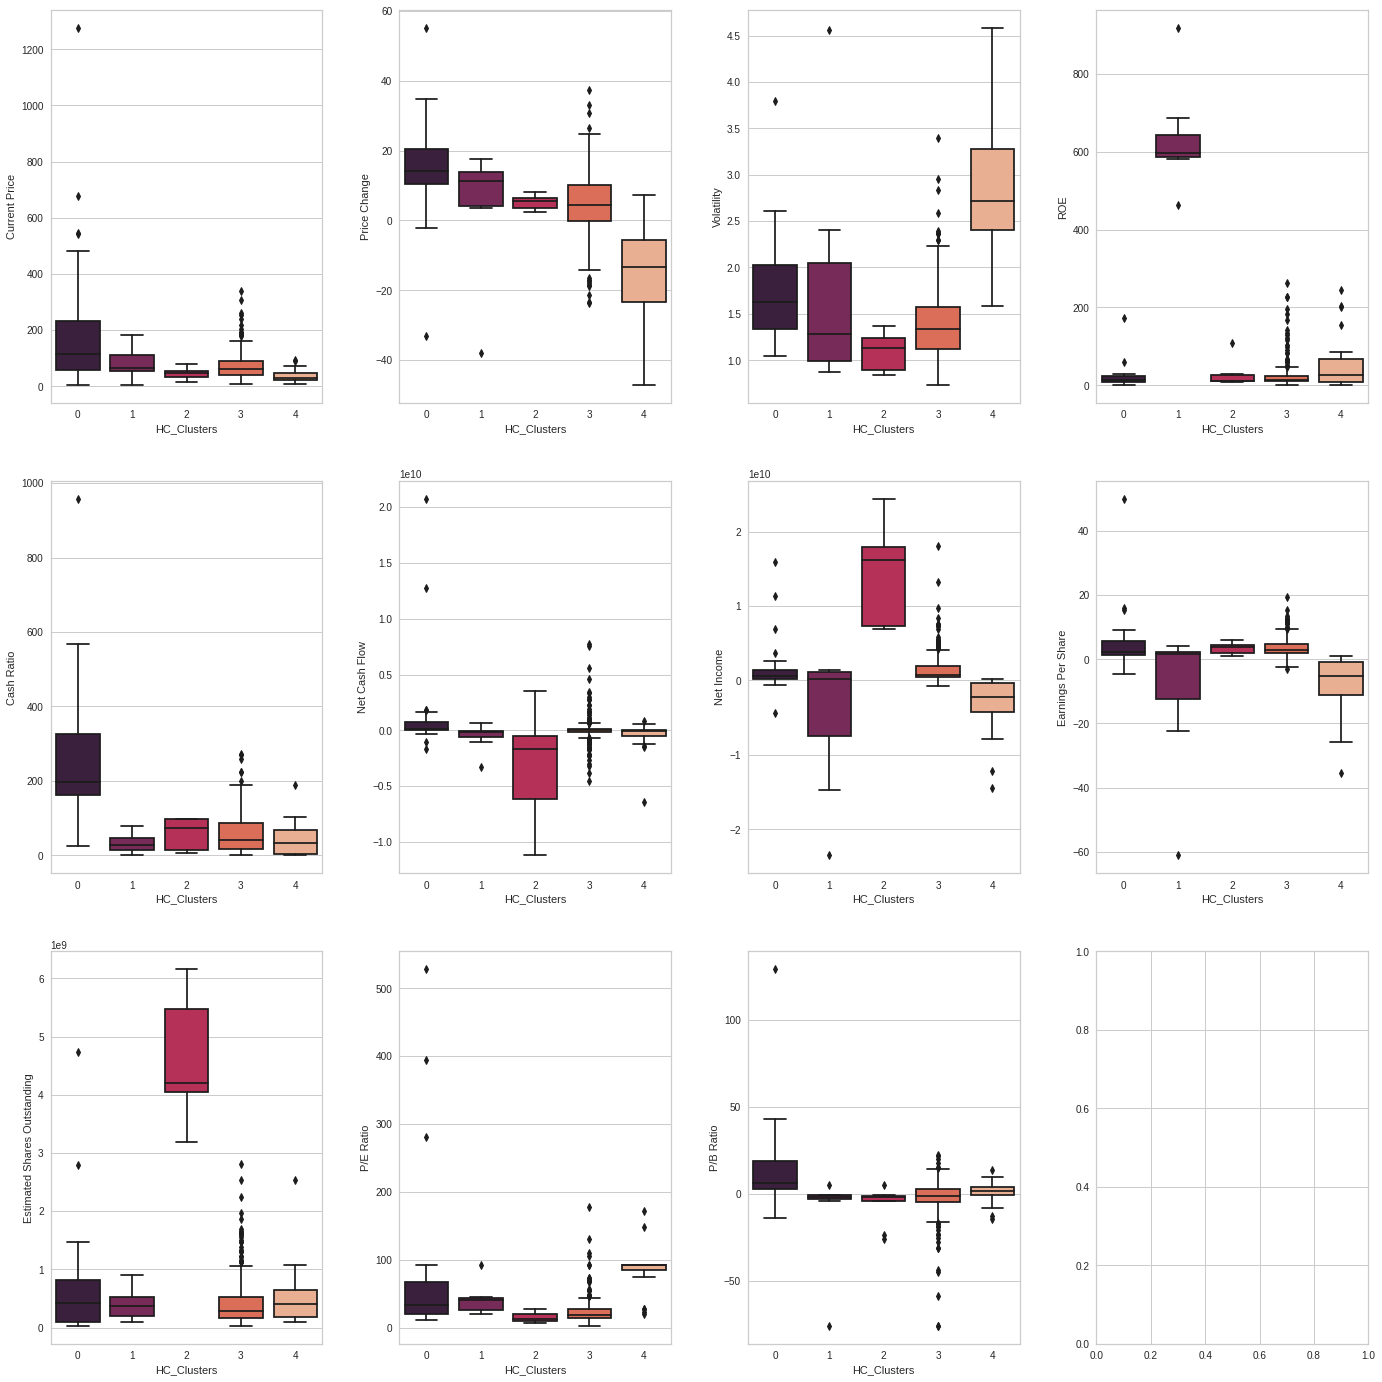

In [71]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=data,
                y=data.columns[3+counter],
                x="HC_Clusters",
                palette="rocket"
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

In [72]:
for k in range(0,data['HC_Clusters'].nunique()):
    print('The number of stocks within each GICS Sector for Cluster '+str(k)+' are:')
    print(data[data['HC_Clusters']==k]['GICS Sector'].value_counts())
    print("   ")

The number of stocks within each GICS Sector for Cluster 0 are:
Information Technology         9
Health Care                    8
Consumer Discretionary         5
Financials                     1
Real Estate                    1
Telecommunications Services    1
Consumer Staples               1
Materials                      1
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 1 are:
Energy                    2
Consumer Staples          2
Industrials               1
Consumer Discretionary    1
Financials                1
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 2 are:
Financials                     3
Telecommunications Services    2
Consumer Discretionary         1
Consumer Staples               1
Health Care                    1
Energy                         1
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 3 are:
Industrials                    52


**Observation**

**Cluster 0**

- 27 stocks
- Information Technology and health care stocks with the highest prices.

**Cluster 1**
- 7 stocks
- Energy and consumer staples bstocks being the highest price.

**Cluster 2**
- 9 Stocks 
- Financials being the highest.

**Cluster 3**
- 265 stocks 
- Industrials bringing the majority stocks.

**Cluster 4**
- 22 stocks 
- With only three types of stocks.


###**K-means vs Hierarchical Clustering**

**1. Which clustering technique took less time for execution?**

The implementations of both the techniques was quite quick take nearlythe same amount of time to execute.

**2. Which clustering technique gave you more distinct clusters, or are they the same? How many observations are there in the similar clusters of both algorithms?**

* The observation in each cluster were quite similar.

**3. How many clusters are obtained as the appropriate number of clusters from both algorithms?**

* 5 cluster for each algorithms.

**4. Differences or similarities in the cluster profiles from both the clustering techniques**

* Both Kmeans and hierarchial clustering yield similar clusters.

###**Actionable Insights and Recommendations**


* Out of 340 data set, K-means clustred all the 340 data set while Hierarchial clustering only clustred 330 data set.
* Information technology and health care seems to be very profitable. 
* The energy industry shows a high volatility on stock prices which becomes risker to invest but has very high P/E ratio in this distribution compared to the others.
* In hierchical clustering, cluster 0 is the best option for investing.
* In K-means clustering, cluster 4 has the best attributes for investing.
* The clustered stock shouls be diversified in order to maximize profit.
* The firm could use these clusters for further financial statement analysis and predict risk, profits and investment strategies.
